# Customer churn analysis & prediction - Project

=====================================================================================

## Project Overview:
- This project aims to predict why customers leave by looking at their information, such as age, account details, and services they use. We will create models to find out what causes churn and help businesses keep their customers. The insights will guide efforts to improve customer retention.

## Project Outline :
- Data Collection and Exploration
- Data Analysis and Visualization
- Machine Learning Model Development
- MLops & Deployment & Final Presenation

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Understand the data

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Customer ID

In [ ]:
data.drop('customerID', axis=1, inplace=True )
cols=data.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Total Charges

In [ ]:
data['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [ ]:
data[data['TotalCharges']==' '].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # coerce => If the data null will put NAN instead of rease error

In [ ]:
data['TotalCharges'].dtype

dtype('float64')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data.duplicated().sum()

22

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(7021, 20)

### Missing Values

In [ ]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
data[data['TotalCharges'].isna()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


<Axes: >

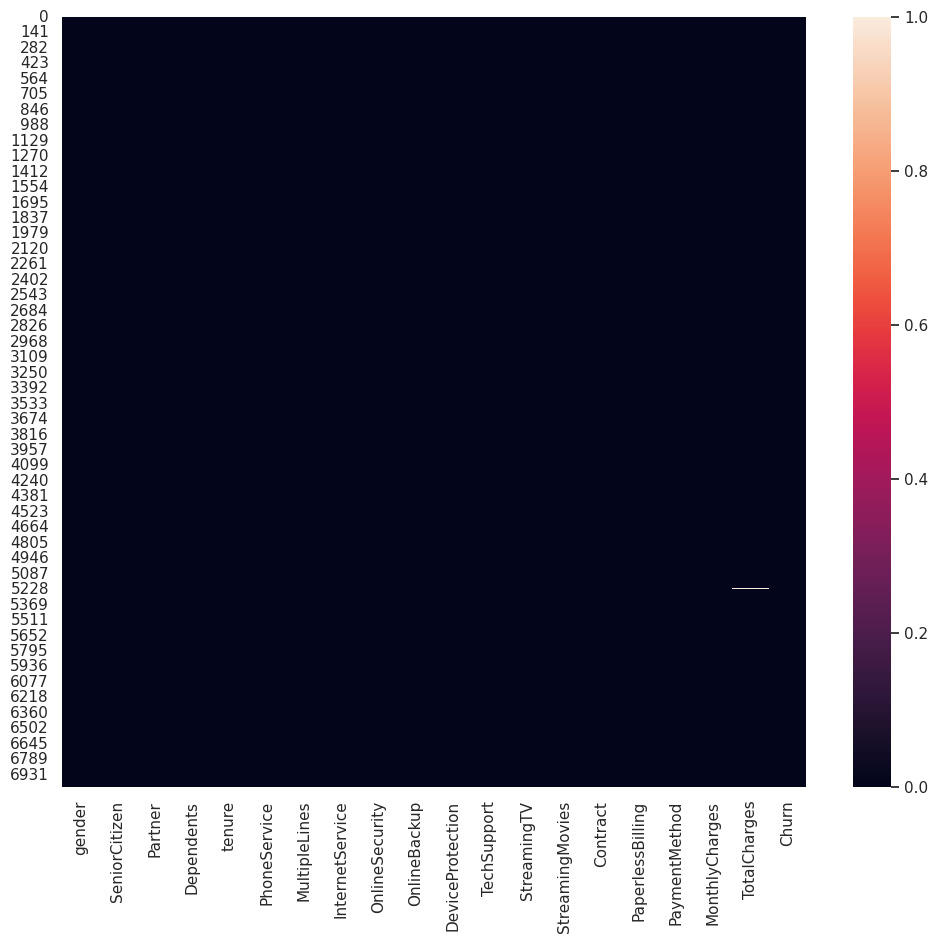

In [ ]:
# Let's Visualize Missing Data
plt.figure(figsize=(12,10))
sns.heatmap(data.isna())

### Handle Missing Values

In [ ]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [ ]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


=================================================================================================

### Exploratory Data Analysis(EDA) with visualizations

### 1. Distribution Of Churn

In [ ]:
data['Churn'] = (data['Churn'] == 'Yes').astype(int)

In [ ]:
data['Churn'].value_counts()  # Churned Customers in the dataset are less than not churned customers (imbalanced data)

,count
Churn,
0,5164
1,1857


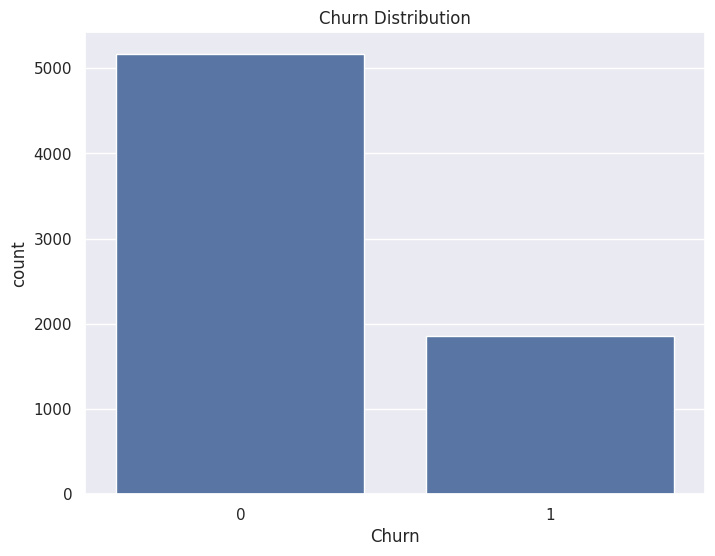

In [ ]:
plt.figure(figsize = (8 , 6))
sns.countplot(x = 'Churn' , data = data)
plt.title('Churn Distribution')
plt.show()

Text(0.5, 1.0, 'Pie chart of churn labels')

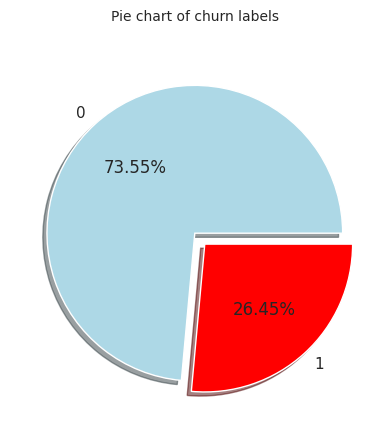

In [ ]:
plt.pie(
    data['Churn'].value_counts(),
    autopct="%.2f%%",
    labels=(data['Churn'].value_counts()).index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of churn labels", pad=20, fontsize=10, fontweight=20)

**76.39% No & 23.61% Yes , then unbalanced data**

### 2. Distribution Of tenure & Distribution of Monthly Charges & Distribution of Total Charges

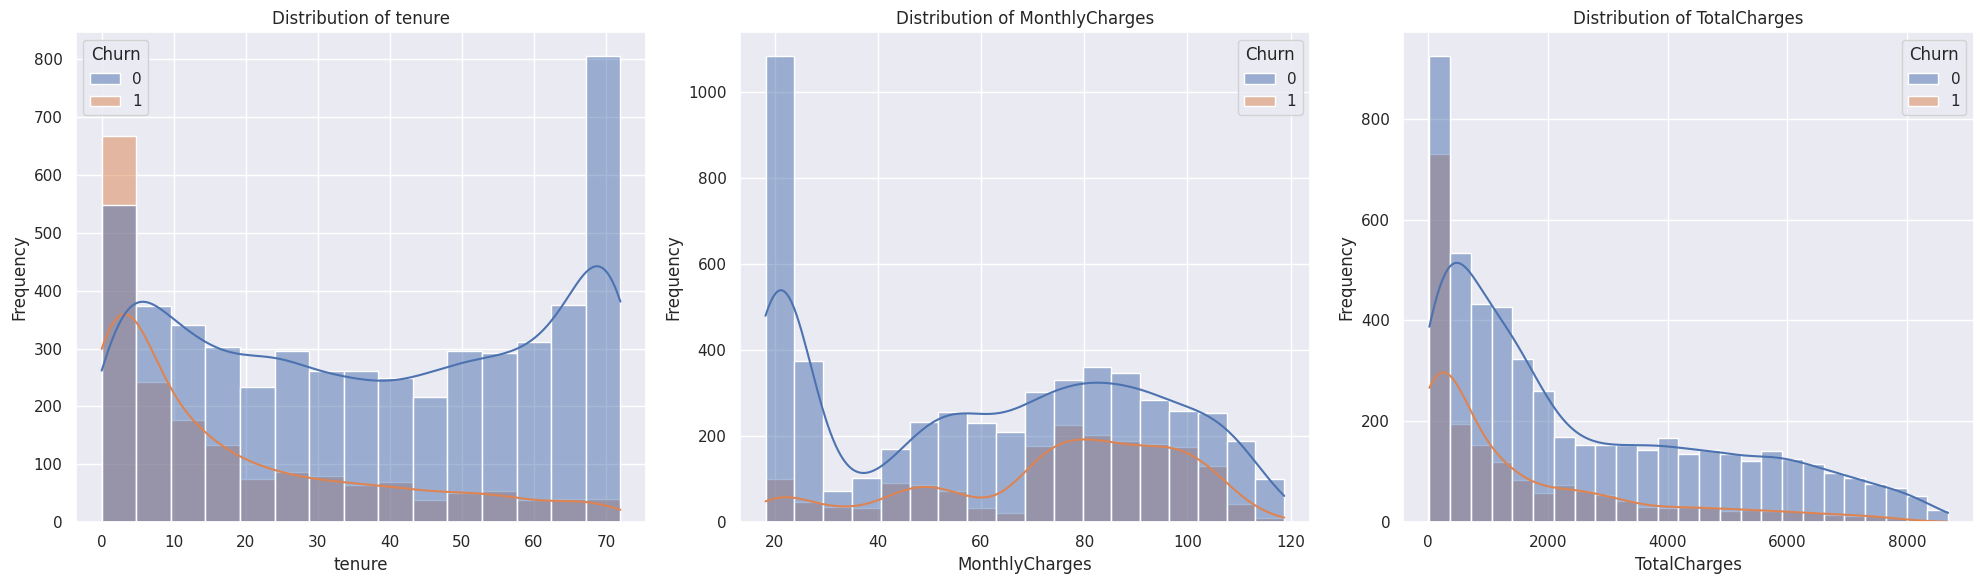

In [ ]:
num_col=['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(20, 6))
for i,col in enumerate(num_col,1):
    plt.subplot(1,3,i)
    sns.histplot(data=data, x=data[col], kde=True, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- the increase in number of months , the decrease in churn
- customers between 20 , 30 are the best in payment and have loyality , while customers between 70 , 100 have increase in churn
- the decrease in totalCharge per months , the increase in churn

NOTES:-
1. Distribution of Tenure vs. Churn:
Observation: The longer a customer stays (higher tenure), the less likely they are to churn.

Key Finding: There is a high churn rate for customers with very low tenure (less than 10 months). Churn significantly decreases as tenure increases, suggesting that long-term customers are more loyal.
2. Distribution of Monthly Charges vs. Churn:
Observation: Customers with lower monthly charges (around 20-40) are less likely to churn compared to customers with mid to high monthly charges.

Key Finding: There is a noticeable increase in churn for customers with higher monthly charges, indicating that higher monthly fees may lead to dissatisfaction and increase churn risk.
3. Distribution of Total Charges vs. Churn:
Observation: Customers with lower total charges (under 2000) have a higher churn rate, which aligns with lower tenure.

Key Finding: The churn rate decreases as total charges increase, likely due to the relationship between total charges and tenure (longer tenure results in higher total charges and more loyalty).

**Final Conclusion:
The key takeaway is that higher tenure and lower monthly charges are strong indicators of customer loyalty, while high monthly charges and shorter tenure increase the risk of churn.**

### 3. Monthly Charges & Churn (Box plot)

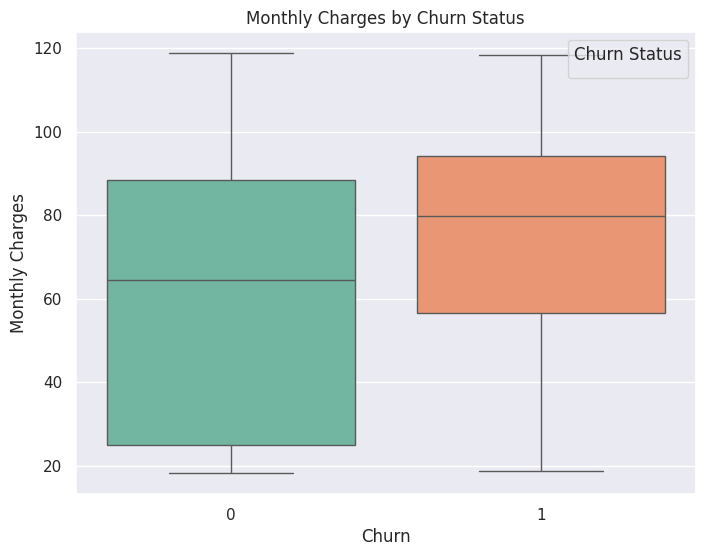

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Churn Status", loc='upper right')
plt.show()

### 4. Correlation Heatmap for Numeric Features

In [ ]:
# select only numeric columns
numeric_data = data.select_dtypes(include=["float64", "int64"])

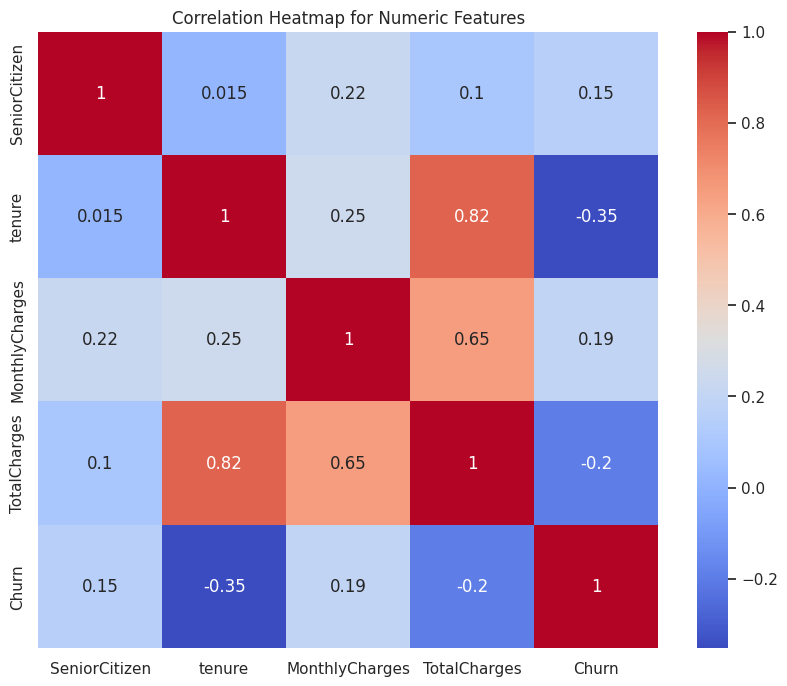

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

### Churn by Payment Method(Bar Blot)

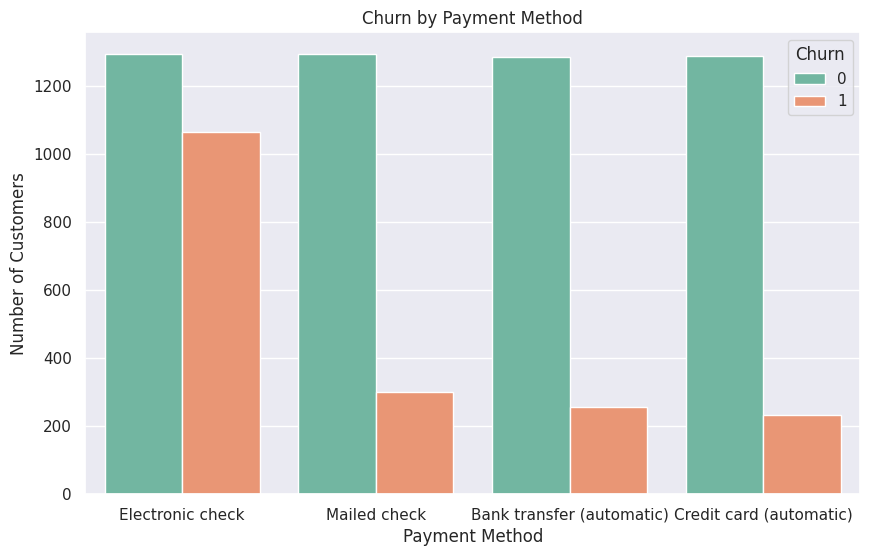

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

### Monthly Charges & Total Charges (Scatter Plot)

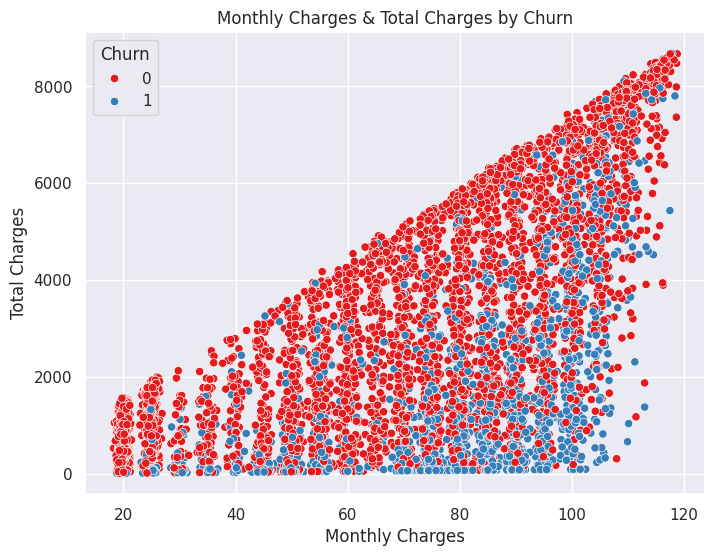

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data, palette='Set1')
plt.title('Monthly Charges & Total Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn', loc='upper left')
plt.show()

In [ ]:
data.sample(10).T

,427,2793,3819,3985,1293,568,5756,2670,6917,6879
gender,Female,Male,Male,Male,Male,Female,Female,Female,Female,Female
SeniorCitizen,0,0,0,1,0,0,0,0,0,0
Partner,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Yes
Dependents,Yes,No,No,No,Yes,No,No,Yes,No,No
tenure,10,4,46,16,67,35,53,51,72,21
PhoneService,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,Yes,No phone service,No,Yes,Yes,No,Yes,Yes,No
InternetService,Fiber optic,Fiber optic,DSL,DSL,Fiber optic,Fiber optic,No,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No internet service,Yes,Yes,No
OnlineBackup,No,No,No,Yes,Yes,No,No internet service,No,Yes,No


# Splitting tenure with visualization

In [ ]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

data['TenureGroup'] = data['tenure'].apply(tenure_group)

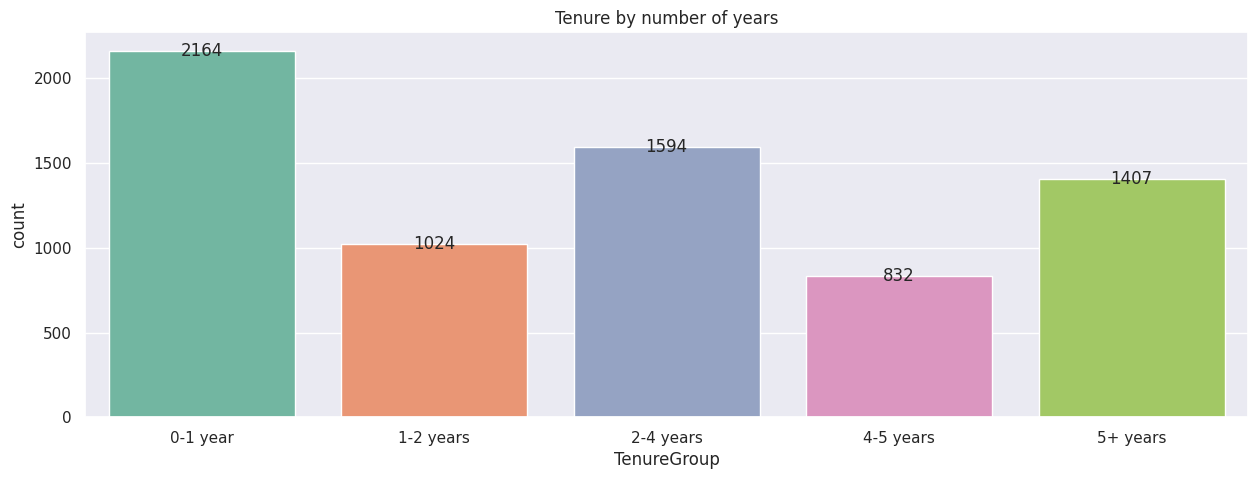

In [ ]:
tenure_order = ['0-1 year', '1-2 years', '2-4 years', '4-5 years', '5+ years']
plt.figure(figsize=(15,5))
sns.countplot(x=data.TenureGroup, data=data, palette='Set2', order=tenure_order)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.title('Tenure by number of years')
plt.show()

# Visualzing the categorical features

In [ ]:
cat_cols = data.select_dtypes('object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TenureGroup'],
      dtype='object')

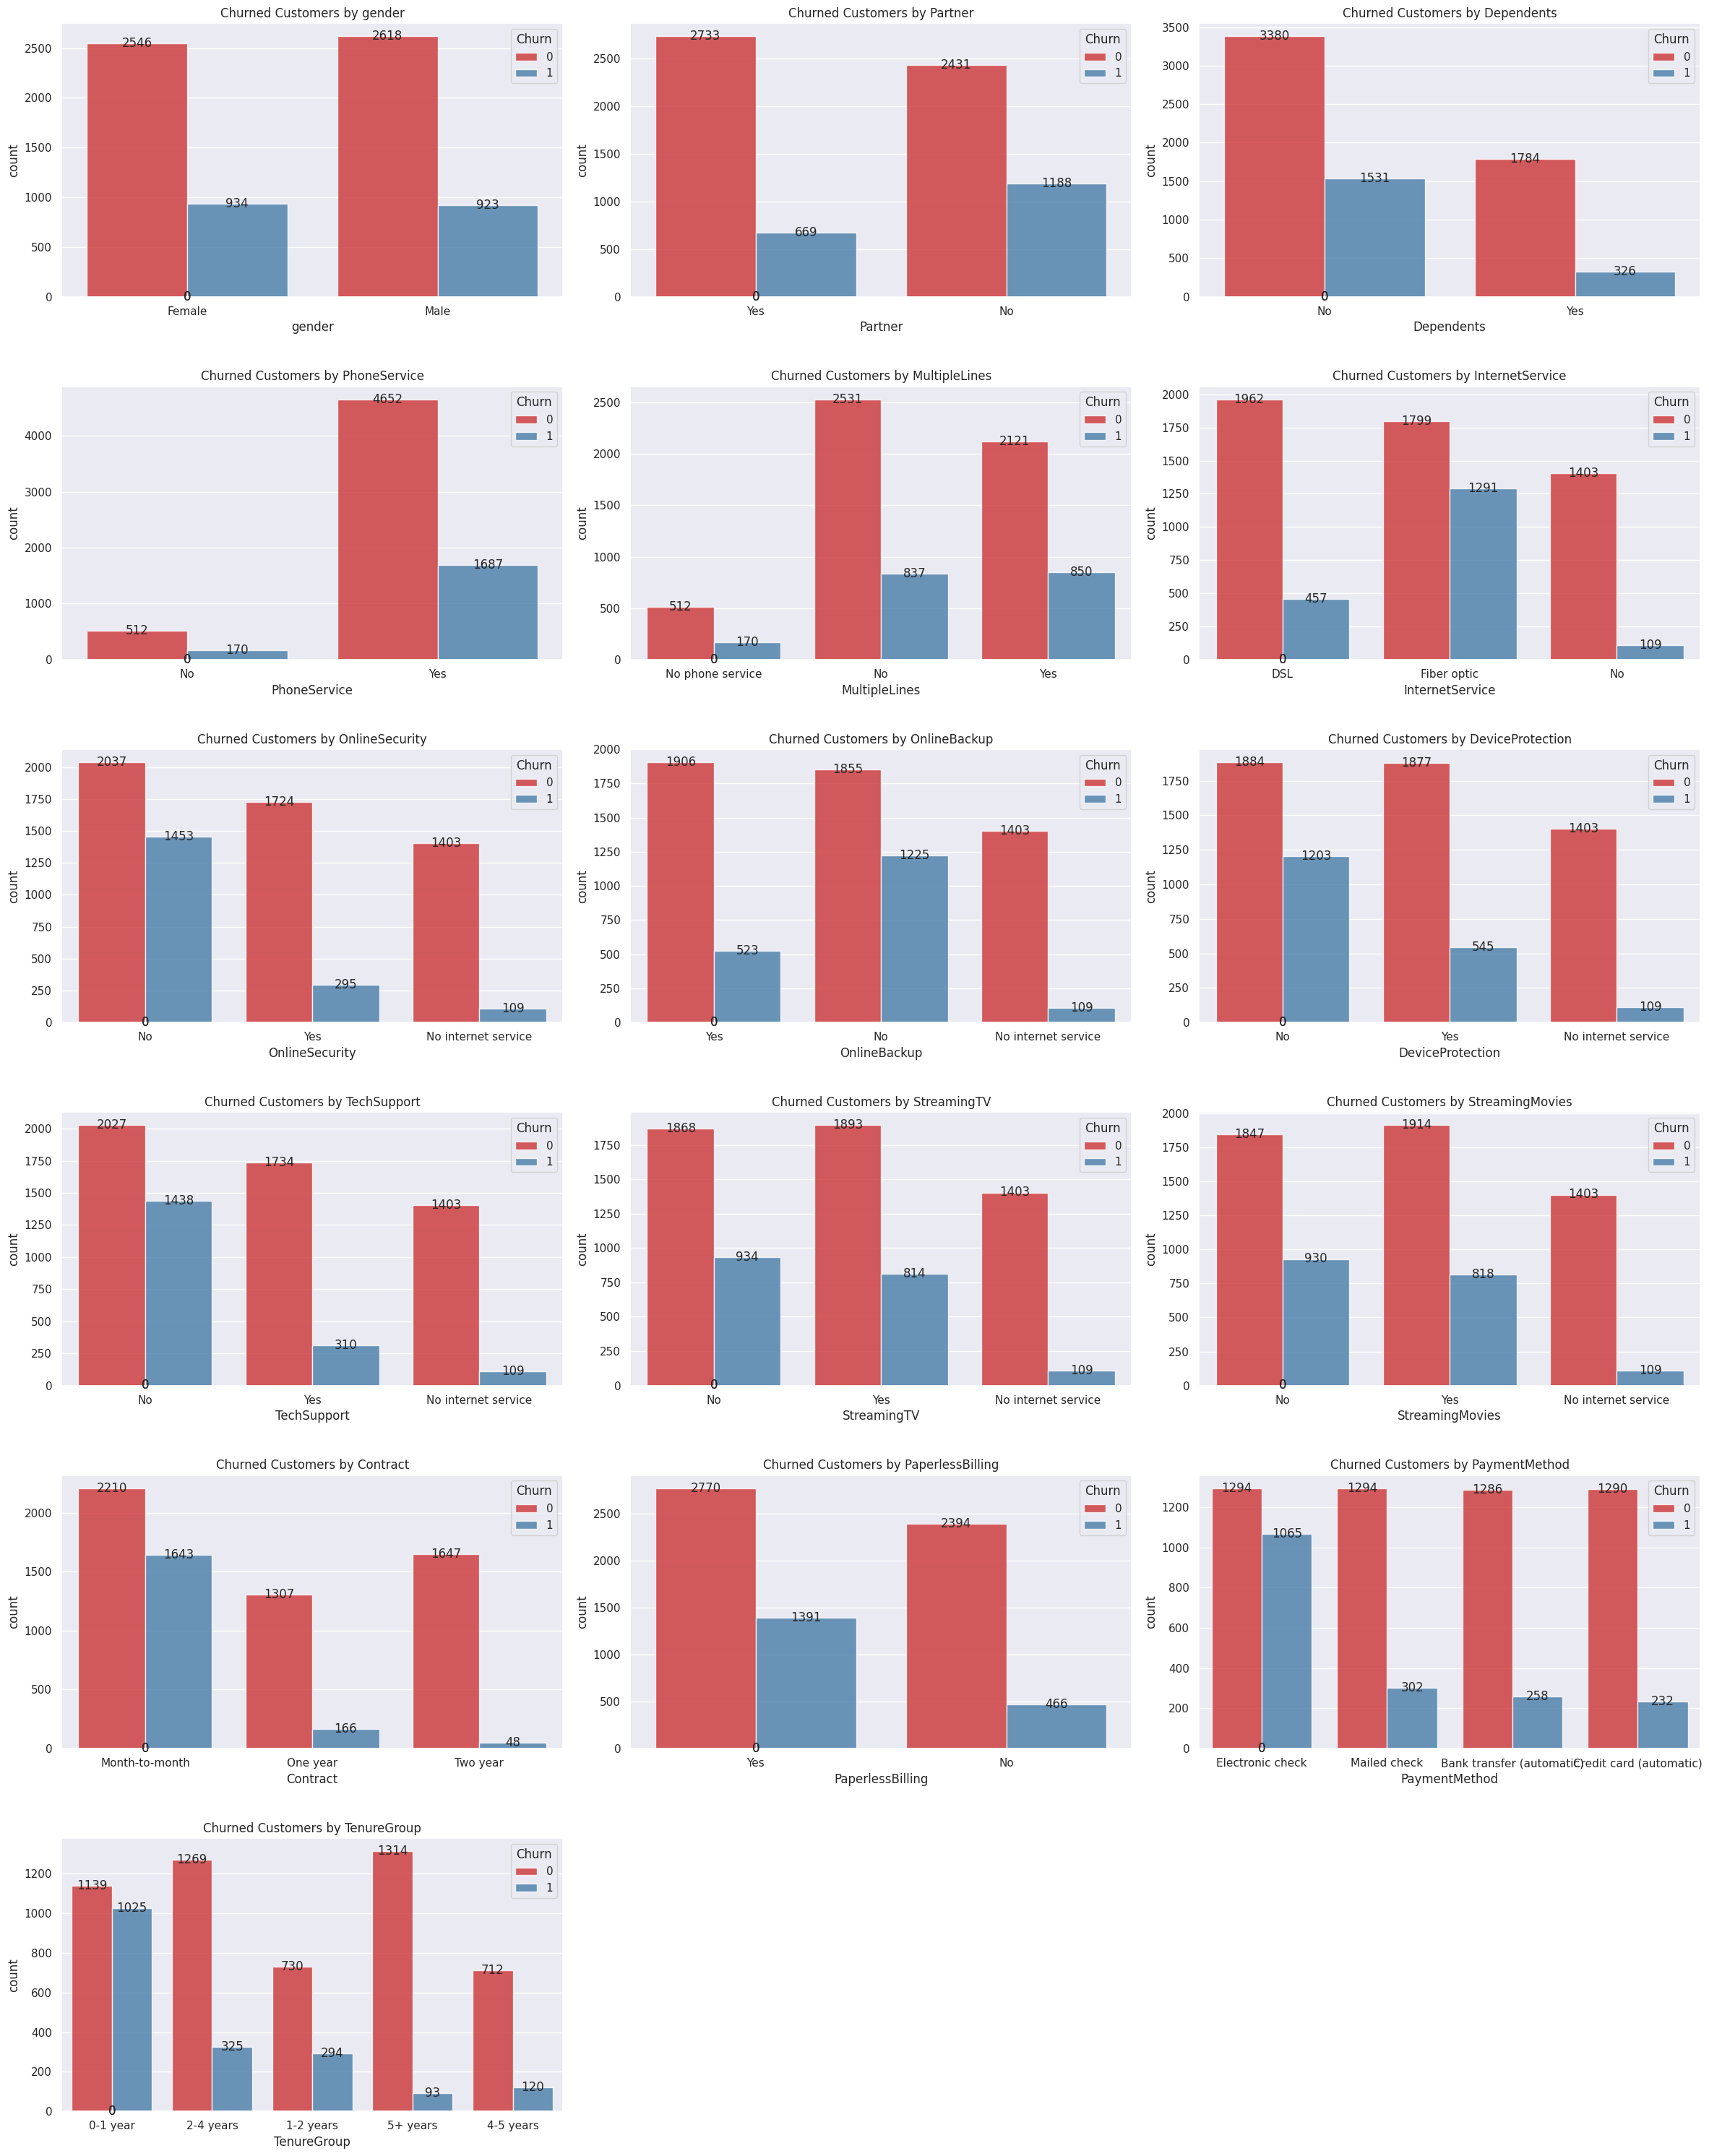

In [ ]:
plt.figure(figsize=(24,30))
for i,col in enumerate(cat_cols,1):
    plt.subplot(6,3,i)
    sns.countplot(data=data, x=col, hue='Churn', palette='Set1', alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3)


#### Data Splitting & Pre-Processing

In [ ]:
# # Identify categorical and numeric columns
# categorical_cols = data.select_dtypes(include=['object', 'category']).columns
# numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
# import pickle

# # Label Encoding for categorical columns
# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le  # Save each encoder

# # Save the LabelEncoders
# with open('label_encoders.pkl', 'wb') as f:
#     pickle.dump(label_encoders, f)

In [ ]:
label_encoder = LabelEncoder()
for col in cat_cols:
  data[col] = label_encoder.fit_transform(data[col].astype(str))

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,1
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,0,4
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,1,0


# Split the dataframe into target variable and independent variables



In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

 **Resampling to handle class inbalance**

In [ ]:
from imblearn.combine import SMOTEENN

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine oversampling and undersampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
1    2615
0    2107
Name: count, dtype: int64


In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_resampled, y_resampled = smote.fit_resample(X, y)

# X_resampled.shape, y_resampled.shape

# Splitting Data for Model Traning & Testing

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val)
X_train.shape, X_val.shape, X_test.shape


((3399, 20), (378, 20), (945, 20))

**Standard Scaler for standardization**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# import pickle

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform validation and test sets using the fitted scaler
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # Save the scaler to a file for future use
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


**Additional Statistical Analysis**

In [ ]:
from scipy.stats import chi2_contingency

# Chi-Square test for Churn vs. TenureGroup
contingency_table = pd.crosstab(data['TenureGroup'], data['Churn'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test between Churn and TenureGroup: Chi2 = {chi2}, p-value = {p}")


Chi-Square Test between Churn and TenureGroup: Chi2 = 866.0006652328672, p-value = 3.871104941758139e-186


**preview X_train**

In [ ]:
X_train

array([[-0.81219946, -0.37139068, -0.75833338, ..., -0.708398  ,
         0.35938512,  1.05095363],
       [-0.81219946, -0.37139068,  1.31868124, ...,  0.79374397,
         1.95896122,  1.7175316 ],
       [ 1.23122465, -0.37139068, -0.75833338, ...,  0.48101134,
        -0.44207989, -0.9487803 ],
       ...,
       [ 1.23122465, -0.37139068, -0.75833338, ..., -0.45635144,
        -0.04513241,  0.38437565],
       [-0.81219946, -0.37139068, -0.75833338, ...,  1.67896529,
         3.20378933,  1.7175316 ],
       [ 1.23122465, -0.37139068,  1.31868124, ...,  0.74418525,
         2.22945416,  1.7175316 ]])

**modeling phase**

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.07, 0.08, 0.09],
    'n_estimators': [100, 250, 200],
    'gamma': [0.07, 0.08, 0.09],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.9, 1.0, 1.1]
}

# Create and train model
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Train final model with best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

best_model = xgb.XGBClassifier(
    **best_params,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

eval_set = [(X_train, y_train), (X_val, y_val)]
best_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)


Best parameters found: {'colsample_bytree': 0.9, 'gamma': 0.07, 'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 250, 'subsample': 0.9}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.07, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create and train model
rf_clf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Train final model with best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

best_model = RandomForestClassifier(
    **best_params,
    random_state=42
)

best_model.fit(X_train, y_train)


Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create and train model
svm_clf = SVC(random_state=42, probability=True)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Train final model with best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

best_model = SVC(
    **best_params,
    random_state=42,
    probability=True
)

best_model.fit(X_train, y_train)


Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=1, probability=True, random_state=42)

In [ ]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Create a Voting Classifier with the three models
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42, probability=True))
    ],
    voting='soft'  # Use 'soft' for probabilistic voting
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Voting Classifier: {accuracy}")
print(classification_report(y_test, y_pred))



Accuracy of Voting Classifier: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       422
           1       0.96      0.98      0.97       523

    accuracy                           0.96       945
   macro avg       0.96      0.96      0.96       945
weighted avg       0.96      0.96      0.96       945



**Model Evaluation**



Validation Set Results:
Accuracy: 0.9233
AUC: 0.9792

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.93      0.93      0.93       209

    accuracy                           0.92       378
   macro avg       0.92      0.92      0.92       378
weighted avg       0.92      0.92      0.92       378



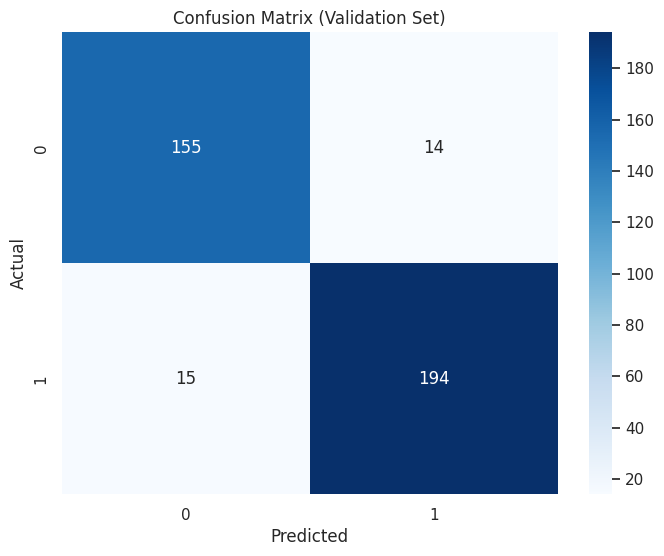


Test Set Results:
Accuracy: 0.9439
AUC: 0.9834

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       422
           1       0.94      0.96      0.95       523

    accuracy                           0.94       945
   macro avg       0.94      0.94      0.94       945
weighted avg       0.94      0.94      0.94       945



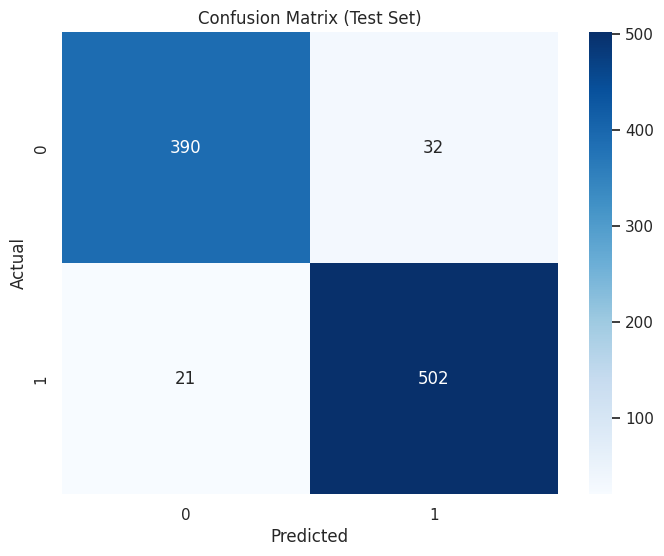

In [ ]:
# Evaluate model
def evaluate_model(model, X, y, set_name='Test'):
    """Evaluate model performance."""
    # Make predictions
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba)

    # Print results
    print(f"\n{set_name} Set Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix(y, y_pred),
        annot=True,
        fmt='d',
        cmap='Blues'
    )
    plt.title(f'Confusion Matrix ({set_name} Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate on validation set
evaluate_model(best_model, X_val, y_val, 'Validation')

# Evaluate on test set
evaluate_model(best_model, X_test, y_test, 'Test')

# Plot feature importance
def plot_feature_importance(model, feature_names):
    """Plot feature importance."""
    # Get feature importance
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importance)), importance[indices])
    plt.xticks(
        range(len(importance)),
        [feature_names[i] for i in indices],
        rotation=90
    )
    plt.tight_layout()
    plt.show()

    # Print ranking
    print("\nFeature Ranking:")
    for f in range(len(importance)):
        print(f"{f + 1}. {feature_names[indices[f]]} ({importance[indices[f]]:.4f})")

# Plot feature importance
# plot_feature_importance(best_model, X.columns)


**Save the Model for Deployment**

In [ ]:
import pickle

# Save the model to a file
filename = 'churn_prediction_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

print(f"Model saved as {filename}")


Model saved as churn_prediction_model.pkl


**Load the saved model to make prediction**

In [ ]:
loaded_model = pickle.load(open('churn_prediction_model.pkl', 'rb'))

In [ ]:
loaded_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

**Check for model prediction biasing**

In [ ]:
y_pred = loaded_model.predict(X_test)
print(pd.Series(y_pred).value_counts())


1    534
0    411
Name: count, dtype: int64


**Compare between y_prediction and y_test to monitor saved model performance**

In [ ]:
# Load the saved model
loaded_model = pickle.load(open('churn_prediction_model.pkl', 'rb'))

# Make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)


     Actual  Predicted
0         1          1
1         1          1
2         0          0
3         1          1
4         1          1
..      ...        ...
940       1          1
941       1          1
942       1          0
943       1          1
944       0          0

[945 rows x 2 columns]


In [ ]:
comparison_df.value_counts()


Actual  Predicted
1       1            502
0       0            390
        1             32
1       0             21
Name: count, dtype: int64

In [ ]:
comparison_df.tail()

,Actual,Predicted
940,1,1
941,1,1
942,1,0
943,1,1
944,0,0


In [ ]:
# import pickle
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Load the saved model
# loaded_model = pickle.load(open('churn_prediction_model.pkl', 'rb'))

# # Load the original dataset to get column names and data types
# data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# X = data.drop(['Churn', 'customerID'], axis=1)

# # Identify numeric and categorical columns
# numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = X.select_dtypes(include=['object']).columns

# # Initialize preprocessors
# scaler = StandardScaler()

# # Create a dictionary to store the label encodings
# label_encodings = {}

# # Fit label encoders and store encodings
# for col in categorical_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col].astype(str))
#     label_encodings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# # Handle 'TotalCharges'
# X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
# X['TotalCharges'].fillna(X['TotalCharges'].median(), inplace=True)

# # Fit the scaler
# scaler.fit(X[numeric_cols])

# # Save the label encoders and scaler
# with open('label_encoders.pkl', 'wb') as f:
#     pickle.dump(label_encodings, f)

# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# def preprocess_input(input_data, categorical_cols, numeric_cols, label_encodings, scaler):
#     """Preprocesses input data to match the format of the training data."""

#     # Convert input_data to DataFrame
#     input_df = pd.DataFrame([input_data], columns=X.columns)

#     # Apply label encoding to categorical variables
#     for col in categorical_cols:
#         if col in label_encodings:  # Only apply if the column has encoding
#             input_df[col] = input_df[col].map(label_encodings[col]).fillna(-1).astype(int)

#     # Handle 'TotalCharges'
#     input_df['TotalCharges'] = pd.to_numeric(input_df['TotalCharges'], errors='coerce')
#     input_df['TotalCharges'].fillna(X['TotalCharges'].median(), inplace=True)

#     # Apply scaling to numeric columns
#     input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

#     # Convert to numpy array for prediction
#     processed_input = input_df.values

#     return processed_input

# def get_user_input():
#     """Gets input from the user for each feature."""
#     user_input = {}
#     for column in X.columns:
#         if column in numeric_cols:
#             user_input[column] = float(input(f"Enter value for {column}: "))
#         else:
#             user_input[column] = input(f"Enter value for {column}: ")
#     return user_input

# def predict_churn(input_data):
#     """Predicts churn using the loaded model."""
#     processed_input = preprocess_input(input_data, categorical_cols, numeric_cols, label_encodings, scaler)

#     # Print expected and actual feature counts for debugging
#     print(f"Expected features: {loaded_model.n_features_in_}")
#     print(f"Processed input shape: {processed_input.shape[1]}")

#     # Ensure the input has the correct number of features
#     if processed_input.shape[1] != loaded_model.n_features_in_:
#         raise ValueError(f"Feature shape mismatch, expected {loaded_model.n_features_in_}, got {processed_input.shape[1]}")

#     prediction = loaded_model.predict(processed_input)
#     probability = loaded_model.predict_proba(processed_input)[0][1]
#     return prediction[0], probability

# # Updated static sample input including 'TenureGroup'
# sample_input = {
#     'gender': 'Female',
#     'SeniorCitizen': 0,
#     'Partner': 'Yes',
#     'Dependents': 'No',
#     'tenure': 24,
#     'PhoneService': 'Yes',
#     'MultipleLines': 'No',
#     'InternetService': 'DSL',
#     'OnlineSecurity': 'No',
#     'OnlineBackup': 'Yes',
#     'DeviceProtection': 'No',
#     'TechSupport': 'No',
#     'StreamingTV': 'No',
#     'StreamingMovies': 'No',
#     'Contract': 'One year',
#     'PaperlessBilling': 'Yes',
#     'PaymentMethod': 'Electronic check',
#     'MonthlyCharges': 56.95,
#     'TotalCharges': 1889.5,
#     'TenureGroup': 3  # Adjust this value based on your analysis or dataset
# }

# print("Prediction with sample input:")
# prediction, probability = predict_churn(sample_input)
# print(f"Churn Prediction: {'Yes' if prediction == 1 else 'No'}")
# print(f"Churn Probability: {probability:.2f}")

# # Option for user input
# user_choice = input("\nDo you want to enter your own data? (yes/no): ")
# if user_choice.lower() == 'yes':
#     user_input = get_user_input()
#     print("\nPrediction with user input:")
#     prediction, probability = predict_churn(user_input)
#     print(f"Churn Prediction: {'Yes' if prediction == 1 else 'No'}")
#     print(f"Churn Probability: {probability:.2f}")
